In [1]:
import tensorflow.keras
keras.__version__

NameError: name 'keras' is not defined

# Overfitting et underfitting


## Comment se battre contre l'overfitting dans un réseau de deep learning ?

Le problème fondamental de l’apprentissage automatique est la tension entre optimisation et généralisation. 


- "Optimisation" fait référence au processus d'ajustement d'un modèle pour obtenir les meilleures performances possibles sur les données d'apprentissage


- "généralisation" se réfère aux performances du modèle formé sur les données qu'il possède


Le but du jeu est bien sûr d’obtenir une bonne généralisation, mais vous ne contrôlez pas la généralisation; vous pouvez uniquement ajuster le modèle en fonction de ses données d'apprentissage.

## Les solutions :

- obtenir davantage de données d'apprentissage

- moduler la quantité d’informations que votre modèle est autorisé à stocker ou à ajouter des contraintes sur les informations qu’elle est autorisée à stocker. On appelle cela la _regularisation_. 

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# Combattre l'overfitting

## Réduire la taille du réseau

Le moyen le plus simple d’empêcher l’overfitting est de réduire la taille du modèle, c’est-à-dire le nombre de paramètres pouvant être appris dans le modèle

Malheureusement, il n’existe pas de formule magique permettant de déterminer le nombre exact de couches ou la taille appropriée de chaque couche. Vous devrez évaluer un ensemble de différentes architectures (sur votre jeu de validation, pas sur votre jeu de test, bien sûr) afin de trouver le bonne taille de modèle pour vos données. 

Le processus général pour trouver une taille de modèle appropriée consiste à commencer avec relativement peu de couches et
paramètres, et commencez à augmenter la taille des couches ou à ajouter de nouvelles couches jusqu'à voir des rendements décroissants en ce qui concerne le perte de validation.

Essayons ceci sur notre réseau de classification de critiques de films. Notre réseau d'origine était en tant que tel:

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])


Essayons maintenant de le remplacer par ce réseau plus petit

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3285 - val_acc: 0.8836
Epoch 2/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.2573 - acc: 0.9077 - val_loss: 0.2864 - val_acc: 0.8883
Epoch 3/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.1992 - acc: 0.9293 - val_loss: 0.2822 - val_acc: 0.8892
Epoch 4/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.1666 - acc: 0.9413 - val_loss: 0.2940 - val_acc: 0.8848
Epoch 5/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.1435 - acc: 0.9502 - val_loss: 0.3115 - val_acc: 0.8806
Epoch 6/20
25000/25000 [==============================] - 4s 150us/step - loss: 0.1258 - acc: 0.9558 - val_loss: 0.3486 - val_acc: 0.8718
Epoch 7/20
25000/25000 [==============================] - 4s 159us/step - loss: 0.1111 - acc: 0.9616 - val_loss: 0.3583 - 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 159us/step - loss: 0.5804 - acc: 0.7027 - val_loss: 0.5309 - val_acc: 0.7558
Epoch 2/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.4843 - acc: 0.8454 - val_loss: 0.4876 - val_acc: 0.8282
Epoch 3/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.4389 - acc: 0.8916 - val_loss: 0.4665 - val_acc: 0.8493
Epoch 4/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.4077 - acc: 0.9153 - val_loss: 0.4536 - val_acc: 0.8638
Epoch 5/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.3832 - acc: 0.9304 - val_loss: 0.4516 - val_acc: 0.8613
Epoch 6/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.3621 - acc: 0.9411 - val_loss: 0.4423 - val_acc: 0.8726
Epoch 7/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.3426 - acc: 0.9508 - val_loss: 0.4493 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>


Comme vous pouvez le constater, le réseau le plus petit commence à surcharger plus tard que le réseau de référence (après 6 époques plutôt que 4) et ses performances.
se dégrade beaucoup plus lentement une fois qu'il commence à overfitting.

## Ajout de la régularisation du poids


Vous connaissez peut-être le principe de rasoir d'Occam : si deux explications sont données, l'explication la plus susceptible d'être correcte est "la plus simple", celui qui émet le moins d'hypothèses. 

Ceci s’applique également aux modèles appris par les réseaux de neurones.

Il existe plusieurs ensembles de valeurs de pondération (plusieurs modèles) pouvant expliquer les données, et les modèles plus simples risquent moins d'overfitter que les modèles complexes.

Un "modèle simple" dans ce contexte est un modèle où la distribution des valeurs de paramètre a moins d'entropie. 

Un moyen courant d’atténuer l’overfitting consiste à imposer des contraintes à la complexité du réseau en forçant ses poids à ne prendre que de petites valeurs, ce qui rend la distribution des valeurs de poids plus "régulière". 

Il s'agit de la "régularisation des poids", et cela se fait en ajoutant à la fonction de perte du réseau un _seuil_ associé à des poids importants. 


* Régularisation L1, où le coût ajouté est proportionnel à la valeur absolue des coefficients de pondération

* Régularisation L2, où le coût ajouté est proportionnel à la valeur carrée de la valeur des coefficients de pondération 


Dans Keras, la régularisation du poids est ajoutée en transmettant _weight weightizer instances_ aux couches comme arguments de mots clés. Ajoutons le poids L2 régularisation à notre réseau de classification de critiques de films:

In [9]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])


`l2 (0.001)` signifie que chaque coefficient de la matrice de pondération de la couche ajoute `0.001 * weight_coefficient_value` à la perte totale du réseau. 

Notez que, comme cette pénalité n’est ajoutée que lors de la formation, la perte pour ce réseau sera beaucoup plus importante lors de l'apprentissage qu'au moment du test.

Voici l'impact de notre pénalité de régularisation L2:

In [11]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.5041 - acc: 0.8084 - val_loss: 0.3782 - val_acc: 0.8838
Epoch 2/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.3131 - acc: 0.9066 - val_loss: 0.3327 - val_acc: 0.8897
Epoch 3/20
25000/25000 [==============================] - 4s 150us/step - loss: 0.2665 - acc: 0.9224 - val_loss: 0.3694 - val_acc: 0.8692
Epoch 4/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2482 - acc: 0.9287 - val_loss: 0.3387 - val_acc: 0.8862
Epoch 5/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.2354 - acc: 0.9353 - val_loss: 0.3804 - val_acc: 0.8694
Epoch 6/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.2228 - acc: 0.9411 - val_loss: 0.3783 - val_acc: 0.8730
Epoch 7/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.2189 - acc: 0.9414 - val_loss: 0.3685 - 

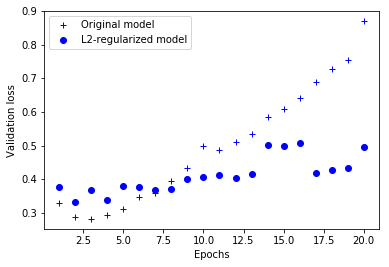

In [12]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

On peut aussi utiliser :

In [ ]:
from tensorflow.keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)


## Ajout de dropout


Le dropout est l’une des techniques de régularisation des réseaux de neurones les plus efficaces et les plus couramment utilisées. Elle a été développée par Hinton et son équipe.


Le dropout, appliqué à une couche, consiste à "abandonner" de manière aléatoire (c'est-à-dire mettre à zéro) un nombre de
caractéristiques de sortie de la couche pendant l'apprentissage. 


Supposons qu'une couche donnée renvoie normalement un vecteur `[0.2, 0.5, 1.3, 0.8, 1.1]` pour un échantillon d'entrée donné pendant l'apprentissage ; après application du dropout, ce vecteur aura quelques zéro réparties de manière aléatoire, par ex. `[0, 0.5, 1.3, 0, 1.1] `. 


Le "taux d'abandon" correspond à la fraction des fonctions en cours de mise à zéro; il est généralement réglé entre 0,2 et 0,5.

Au moment du test, aucune unité n'est supprimée et, à la place, les valeurs de sortie de la couche sont réduites d'un facteur égal au taux d'abandon, de manière à maintenir l’équilibre entre le fait que plus d’unités sont actives qu’au moment de l'apprentissage.


Cette technique peut sembler étrange et arbitraire. Pourquoi cela aiderait-il à réduire l'overfitting? 


Geoff Hinton a déclaré avoir été inspiré, entre autres, par un mécanisme de prévention de la fraude utilisé par les banques - en ses propres termes: 


"Je suis allé à ma banque. Le personnel des guichets ont changé et j'ai demandé à l'un d'entre eux pourquoi. Il a dit que cela nécessitait une coopération entre employés pour frauder avec succès la banque, ce qui m'a fait comprendre que le fait de supprimer au hasard un sous-ensemble différent de neurones sur chaque exemple empêcherait les conspirations et réduit ainsi le surapprentissage".


L'idée centrale est que l'introduction de bruit dans les valeurs de sortie d'une couche peut briser des modèles d'événements qui ne sont pas significatifs (ce que Hinton appelle des "conspirations"), que le réseau commencerait à mémoriser si aucun bruit n'était présent.


Dans Keras, vous pouvez introduire un abandon dans un réseau via la couche `Dropout`, qui est appliquée à la sortie du calque juste avant, par exemple:

In [ ]:
model.add(layers.Dropout(0.5))

In [14]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [15]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.5573 - acc: 0.7182 - val_loss: 0.4038 - val_acc: 0.8624
Epoch 2/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.3982 - acc: 0.8450 - val_loss: 0.3091 - val_acc: 0.8860
Epoch 3/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.3275 - acc: 0.8840 - val_loss: 0.2858 - val_acc: 0.8896
Epoch 4/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.2758 - acc: 0.9065 - val_loss: 0.2796 - val_acc: 0.8880
Epoch 5/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.2435 - acc: 0.9198 - val_loss: 0.2890 - val_acc: 0.8887
Epoch 6/20
25000/25000 [==============================] - 4s 153us/step - loss: 0.2188 - acc: 0.9284 - val_loss: 0.3033 - val_acc: 0.8819
Epoch 7/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.1951 - acc: 0.9376 - val_loss: 0.3225 - 

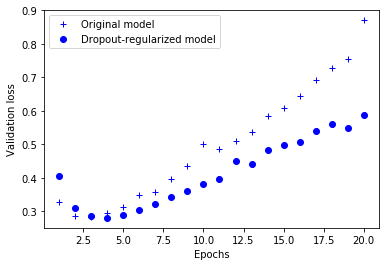

In [16]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()